# Time Series

In [1]:
time_series = [0, 1, 3, 2, 9, 1, 14, 15, 1, 2, 2, 10, 7]

In [2]:
n = len(time_series)
n

13

To analyze: visualize data / calc. global summary statistics (mean, median, mode, min, max)

In [3]:
import matplotlib.pyplot as plt
import numpy as np

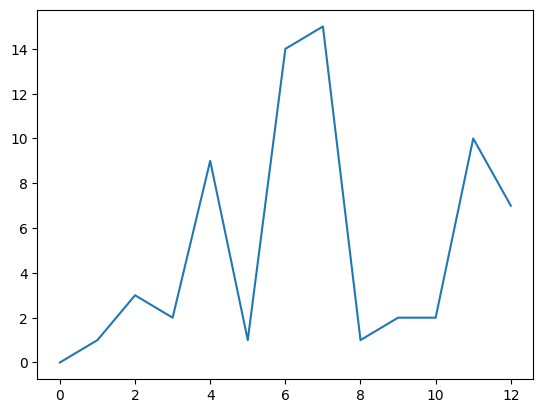

In [4]:
plt.plot(time_series)

## Subsequence

In [5]:
m = 4 # subseq. length
i = 0 # 1st subseq. starting index
j = 8 # 2nd subseq. starting index

subseq_1 = time_series[i:i+m]
subseq_2 = time_series[j:j+m]
subseq_1, subseq_2

([0, 1, 3, 2], [1, 2, 2, 10])

### Euclidean Distance
straight-line distance between two points

In [6]:
import math

D = 0
for k in range(m): # subseq. length
    D += (time_series[i+k] - time_series[j+k]) ** 2
math.sqrt(D)

8.18535277187245

### Distance Profile - Pairwise Euclidean Distances
We keep one subseq. the same (reference subseq.)

Change the 2nd subseq. in a sliding window manner

Compute Euclidean distance for each window

In [7]:
distance_profile = []
for l in range(n-m+1): # time series length - subseq length + 1
    for k in range(m): # subseq. length
        D += (time_series[i+k] - time_series[l+k]) ** 2
    distance_profile.append(round(math.sqrt(D), 1))
    D = 0
distance_profile

[8.2, 7.4, 6.9, 14.7, 19.3, 17.7, 19.9, 15.0, 8.2, 8.9]

### Distance Matrix
We can shift reference subseq. and compute distance profile for each new ref. subseq.

In [8]:
distance_profile = []
distance_matrix = []
for o in range(n-m+1): # time series length - subseq length + 1 = 8
    for l in range(n-m+1): # time series length - subseq length + 1 = 8
        for k in range(m): # subseq. length
            D += (time_series[o+k] - time_series[l+k]) ** 2
        distance_profile.append(round(math.sqrt(D), 1))
        D = 0
    distance_matrix.append(distance_profile)
    distance_profile = []
distance_matrix

[[0.0, 7.4, 6.9, 14.7, 19.3, 17.7, 19.9, 15.0, 8.2, 8.9],
 [7.4, 0.0, 10.9, 7.9, 15.7, 18.8, 19.1, 15.8, 1.4, 8.4],
 [6.9, 10.9, 0.0, 16.8, 16.1, 13.6, 18.8, 14.0, 11.6, 6.2],
 [14.7, 7.9, 16.8, 0.0, 16.8, 19.8, 18.0, 19.4, 8.2, 13.4],
 [19.3, 15.7, 16.1, 16.8, 0.0, 20.7, 23.6, 18.7, 15.3, 11.4],
 [17.7, 18.8, 13.6, 19.8, 20.7, 0.0, 19.2, 23.1, 19.8, 14.4],
 [19.9, 19.1, 18.8, 18.0, 23.6, 19.2, 0.0, 14.1, 20.1, 20.5],
 [15.0, 15.8, 14.0, 19.4, 18.7, 23.1, 14.1, 0.0, 16.2, 16.1],
 [8.2, 1.4, 11.6, 8.2, 15.3, 19.8, 20.1, 16.2, 0.0, 8.6],
 [8.9, 8.4, 6.2, 13.4, 11.4, 14.4, 20.5, 16.1, 8.6, 0.0]]

### Matrix Profile
Store smallest non-trivial distances from each distance profile, reduce spatial complexity

In [9]:
distance_profile = []
matrix_profile = []
for o in range(n-m+1): # time series length - subseq length + 1 = 8
    for l in range(n-m+1): # time series length - subseq length + 1 = 8
        for k in range(m): # subseq. length
            D += (time_series[o+k] - time_series[l+k]) ** 2
        distance_profile.append(round(math.sqrt(D), 1))
        D = 0
    distance_profile.sort()
    matrix_profile.append(distance_profile[1])
    distance_profile = []
matrix_profile

[6.9, 1.4, 6.2, 7.9, 11.4, 13.6, 14.1, 14.0, 1.4, 6.2]

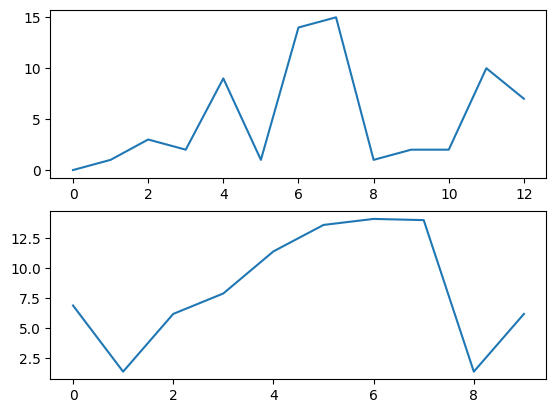

In [10]:
plt.subplot(2, 1, 1)
plt.plot(time_series)
plt.subplot(2, 1, 2)
plt.plot(matrix_profile)

A ref. subseq. w. small matrix profile (nearest neighbor closeby) -> pattern

A ref. subseq. w. large matrix profile (nearest neighbor faraway) -> anomaly

W. matrix profile, we can pick top pattern (global minimum) and rarest anomaly (global maximum)

#### Brute Force 
Computational complexity + Spatial complexity

For longer time series (n>10k):

computational complexity O(mn^2) -> 3 for loops & spatial complexity for storing distance matrix O(n^2)

If each inner loop takes 0.0000001 secs: 4.4 years & 11.1PB of memory to compute